In [1]:
import logging
import numpy
import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype
from math import *
from datetime import datetime
from operator import itemgetter
from zipfile import ZipFile
from io import BytesIO
import pickle
from urllib.request import urlopen

from IPython.display import Image
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from numpy import inf
from scipy.stats import kurtosis, skew

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import average_precision_score
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

from functions import *
from fair_func import *
from full_acf_cuf_regression_final import *

In [2]:
data = pd.read_csv('RAIdata.csv')

In [3]:
data.drop(columns=["Unnamed: 0"], inplace=True)

In [4]:
data.head()

,Age,AppliedAmount,DebtToIncome,ExpectedLoss,LiabilitiesTotal,FreeCash,IncomeFromChildSupport,IncomeFromFamilyAllowance,IncomeFromLeavePay,IncomeFromPension,...,VerificationType_2.0,VerificationType_3.0,VerificationType_4.0,WorkExperience_10To15Years,WorkExperience_15To25Years,WorkExperience_2To5Years,WorkExperience_5To10Years,WorkExperience_LessThan2Years,WorkExperience_MoreThan25Years,Young
0,54.0,8505.0,0.0,0.118622,87.82,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
1,52.0,2230.0,0.0,0.059200,309.23,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
2,28.0,530.0,0.0,0.048764,143.58,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,1
3,40.0,1380.0,0.0,0.071894,70.65,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
4,31.0,530.0,0.0,0.043700,719.42,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,1,0,1


### Full Model - With Sensitive Features

In [5]:
# Gender_1.0 = Male, MaritalStatus_1.0 = Married, LanguageCode_1 = Estonian
data_acf_lin = data[['ProbabilityOfDefault','Age', 'AppliedAmount', 'ExpectedLoss', 'LiabilitiesTotal', 
                     'IncomeTotal','Interest', 'LoanDuration', 'MonthlyPayment', 'Gender_1.0',
                     'MaritalStatus_1.0','LanguageCode_1', 'NrOfDependantslessthan3']]

In [6]:
target_variable = "ProbabilityOfDefault"
protected_features = ['Gender_1.0','MaritalStatus_1.0','LanguageCode_1','NrOfDependantslessthan3']
independent_features = ['Age', 'AppliedAmount', 'ExpectedLoss', 'LiabilitiesTotal','IncomeTotal', 'Interest', 'LoanDuration', 'MonthlyPayment']

In [7]:
for col in data_acf_lin.columns:
    if data_acf_lin.isnull().sum()[col]!=0:
        data_acf_lin[col].fillna((data_acf_lin[col].mean()), inplace=True)  

In [8]:
full_model = Generic(data_acf_lin,protected_features,independent_features,target_variable,False) # initializing object with data and features
full_model.fit() # fitting the model 
full_model_predictions = full_model.predict() # predicting using model 
full_model_metrics = full_model.get_model_metrics() # MSE, RMSE, MAPE
fm_performance_metrics_diff = full_model.get_model_performace_metrics_difference() # Difference in performance between two groups of each feature
fm_distribution_metrics_diff = full_model.get_prediction_distribution_metrics_difference() # Mean, skewness, kurtosis

In [9]:
print("Performance Metrics for Full Model with sensitive features") # MSE, RMSE, MAPE
full_model_metrics

Performance Metrics for Full Model with sensitive features


,Mean Squared Error (Full Model with sensitive features),Root Mean Squared Error (Full Model with sensitive features),Mean Absolute Percentage Error (Full Model with sensitive features)
0,2758.664646,52.522992,30.98901


In [10]:
print("Difference in Performance Metrics for Full Model with sensitive features") # MSE, RMSE, MAPE
fm_performance_metrics_diff

Difference in Performance Metrics for Full Model with sensitive features


,Column,Mean Squared Error Difference (Full Model with sensitive features),Root Mean Squared Error Difference (Full Model with sensitive features),Mean Absolute Percentage Error Difference (Full Model with sensitive features)
0,Gender_1.0,383.863450,3.721345,3.836966
1,MaritalStatus_1.0,1251.842999,13.292916,5.237911
2,LanguageCode_1,230.390463,2.225039,3.599900
3,NrOfDependantslessthan3,694.415929,7.081934,5.229342


In [11]:
print("Difference and Ratio of Distribution Metrics for Full Model with sensitive features") # Mean, Skewness, Kurtosis
fm_distribution_metrics_diff

Difference and Ratio of Distribution Metrics for Full Model with sensitive features


,Column,Mean difference of predicted target value (Full Model with sensitive features),Skewness difference of predicted target value (Full Model with sensitive features),Kurtosis difference of predicted target value (Full Model with sensitive features),Mean ratio of predicted target value (Full Model with sensitive features),Skewness ratio of predicted target value (Full Model with sensitive features),Kurtosis ratio of predicted target value (Full Model with sensitive features)
0,Gender_1.0,19.075917,-0.036593,-0.257038,1.106653,0.969492,0.923905
1,MaritalStatus_1.0,57.353753,-0.252096,0.343232,1.404858,0.832486,1.103554
2,LanguageCode_1,15.047440,-0.108235,-0.248048,1.078933,0.905721,0.923455
3,NrOfDependantslessthan3,-38.993530,-0.103178,-2.495995,0.798371,0.908372,0.216058


Density Plots for Prediction of Sensitive Features by Full Model with sensitive features


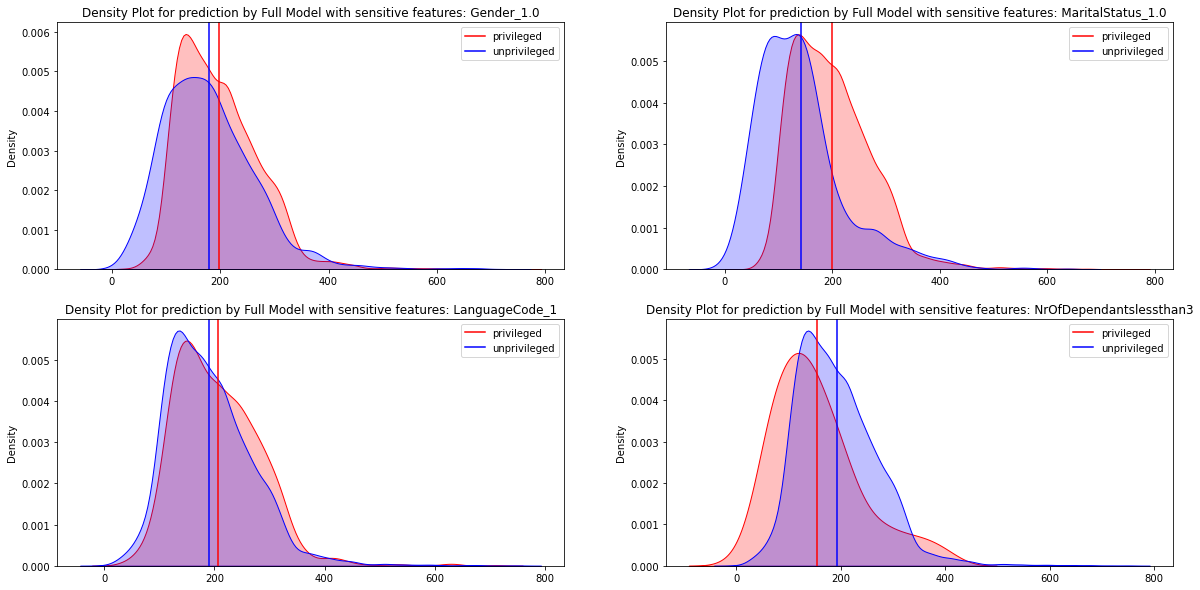

In [12]:
print("Density Plots for Prediction of Sensitive Features by Full Model with sensitive features")
full_model.get_density_plots()

<div class="alert alert-block alert-success">
<b>Inference:</b>
    The density plots for all sensitive variables show that there is huge difference between the distribution of privileged and unprivileged class when the full linear model is trained on data including the sensitive features. This implies that the prediction from the model is completely biased. 
</div>

### Full Model - Without Sensitive Features

In [13]:
data_acf_lin_2 = data[['ProbabilityOfDefault','Age', 'AppliedAmount', 'ExpectedLoss', 'LiabilitiesTotal',
                     'IncomeTotal', 'Interest', 'LoanDuration', 'MonthlyPayment']]

In [14]:
for col in data_acf_lin_2.columns:
    if data_acf_lin_2.isnull().sum()[col]!=0:
        data_acf_lin_2[col].fillna((data_acf_lin_2[col].mean()), inplace=True)  

In [15]:
y=data_acf_lin_2[target_variable]*1000
x=data_acf_lin_2.drop(columns=[target_variable])
X_train_2, X_test_2, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=3000) 

In [16]:
full_model_2 = Generic(data_acf_lin,protected_features,independent_features,target_variable,False,False) # initializing object with data and features
full_model_2.fit(X_train_2) # fitting the model 
full_model_2_predictions = full_model_2.predict(X_test_2) # predicting using model
full_model_2_metrics = full_model_2.get_model_metrics() # MSE, RMSE, MAPE
fm2_performance_metrics_diff = full_model_2.get_model_performace_metrics_difference() # Difference in performance between two groups of each feature
fm2_distribution_metrics_diff = full_model_2.get_prediction_distribution_metrics_difference() # Mean, skewness, kurtosis

In [17]:
print("Performance Metrics for Full Model without sensitive features") # MSE, RMSE, MAPE
full_model_2_metrics

Performance Metrics for Full Model without sensitive features


,Mean Squared Error (Full Model without sensitive features),Root Mean Squared Error (Full Model without sensitive features),Mean Absolute Percentage Error (Full Model without sensitive features)
0,3138.075558,56.018529,35.495167


In [18]:
print("Difference in Performance Metrics for Full Model without sensitive features") # MSE, RMSE, MAPE
fm2_performance_metrics_diff

Difference in Performance Metrics for Full Model without sensitive features


,Column,Mean Squared Error Difference (Full Model without sensitive features),Root Mean Squared Error Difference (Full Model without sensitive features),Mean Absolute Percentage Error Difference (Full Model without sensitive features)
0,Gender_1.0,20.027069,0.178896,1.328567
1,MaritalStatus_1.0,322.807352,2.824990,7.355673
2,LanguageCode_1,174.853498,1.575585,3.141589
3,NrOfDependantslessthan3,353.927643,3.075772,5.988647


In [19]:
print("Difference and Ratio of Distribution Metrics for Full Model without sensitive features") # Mean, Skewness, Kurtosis
fm2_distribution_metrics_diff

Difference and Ratio of Distribution Metrics for Full Model without sensitive features


,Column,Mean difference of predicted target value (Full Model without sensitive features),Skewness difference of predicted target value (Full Model without sensitive features),Kurtosis difference of predicted target value (Full Model without sensitive features),Mean ratio of predicted target value (Full Model without sensitive features),Skewness ratio of predicted target value (Full Model without sensitive features),Kurtosis ratio of predicted target value (Full Model without sensitive features)
0,Gender_1.0,-13.972152,-0.156187,-0.569236,0.931270,0.892557,0.867454
1,MaritalStatus_1.0,7.377276,-0.275573,0.385894,1.039615,0.829284,1.102962
2,LanguageCode_1,9.663338,-0.130966,-0.314651,1.050529,0.906194,0.924227
3,NrOfDependantslessthan3,-1.221738,-0.011058,-2.257477,0.993665,0.991929,0.448341


Density Plots for Prediction of Sensitive Features by Full Model without sensitive features


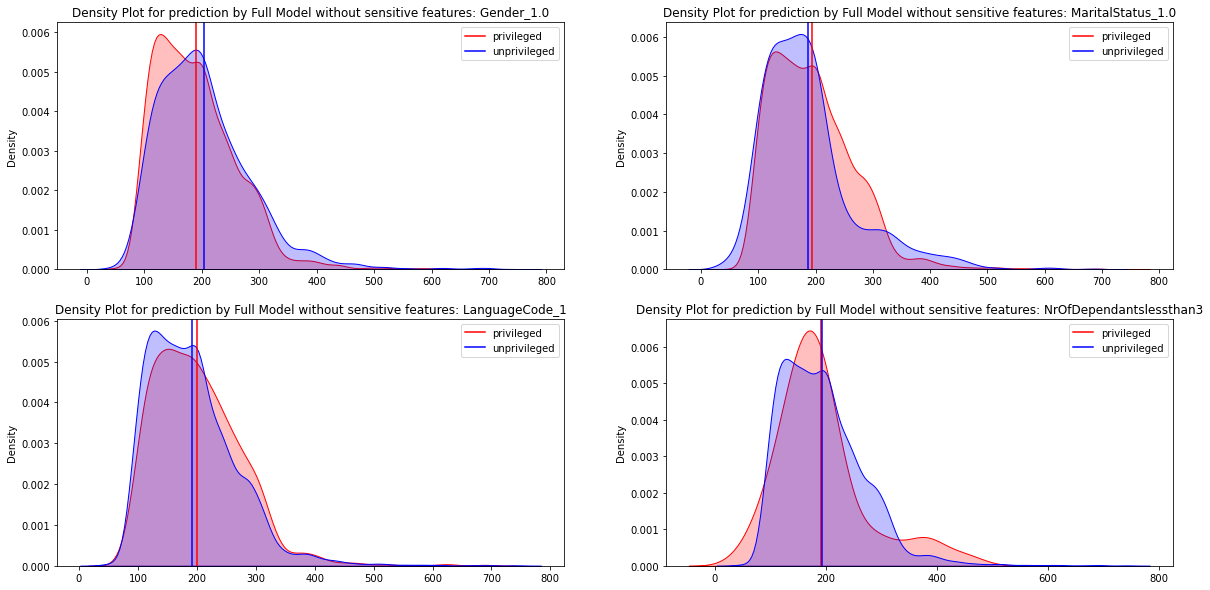

In [20]:
print("Density Plots for Prediction of Sensitive Features by Full Model without sensitive features")
full_model_2.get_density_plots()

<div class="alert alert-block alert-success">
<b>Inference:</b>
    The density plots for all sensitive variables show that there still exists slight difference between the distribution of privileged and unprivileged class except for No. of dependants less than 3 when the full linear model is trained on data without the sensitive features. This implies that the prediction from the model is biased. 
</div>

### ACF Model

In [21]:
ACF = Generic(data_acf_lin,protected_features,independent_features,target_variable,True) # initializing object with data and features
df_R_train = ACF.get_residuals_train_data() # getting residuals which are independent of sensitive features - train data
ACF.fit(df_R_train) # fitting the model
df_R_test = ACF.get_residuals_test_data() # getting residuals which are independent of sensitive features - test data
acf_predictions = ACF.predict(df_R_test) # predicting using model 
acf_metrics = ACF.get_model_metrics() # MSE, RMSE, MAPE
acf_performance_metrics_diff = ACF.get_model_performace_metrics_difference() # Difference in performance between two groups of each feature
acf_distribution_metrics_diff = ACF.get_prediction_distribution_metrics_difference() # Mean, skewness, kurtosis

In [22]:
print("Performance Metrics for ACF Model") # MSE, RMSE, MAPE
acf_metrics

Performance Metrics for ACF Model


,Mean Squared Error (ACF Model),Root Mean Squared Error (ACF Model),Mean Absolute Percentage Error (ACF Model)
0,3116.399766,55.824724,35.65415


In [23]:
print("Difference in Performance Metrics for ACF Model") # MSE, RMSE, MAPE
acf_performance_metrics_diff

Difference in Performance Metrics for ACF Model


,Column,Mean Squared Error Difference (ACF Model),Root Mean Squared Error Difference (ACF Model),Mean Absolute Percentage Error Difference (ACF Model)
0,Gender_1.0,352.746965,3.206042,1.689661
1,MaritalStatus_1.0,1162.340569,9.748099,10.050501
2,LanguageCode_1,19.432952,0.174235,1.263021
3,NrOfDependantslessthan3,744.727022,6.317889,7.005354


In [24]:
print("Difference and Ratio of Distribution Metrics for ACF Model") # Mean, Skewness, Kurtosis
acf_distribution_metrics_diff

Difference and Ratio of Distribution Metrics for ACF Model


,Column,Mean difference of predicted target value (ACF Model),Skewness difference of predicted target value (ACF Model),Kurtosis difference of predicted target value (ACF Model),Mean ratio of predicted target value (ACF Model),Skewness ratio of predicted target value (ACF Model),Kurtosis ratio of predicted target value (ACF Model)
0,Gender_1.0,-2.842171e-14,-0.189227,-0.725181,1.0,0.869892,0.828076
1,MaritalStatus_1.0,2.842171e-14,-0.288660,0.266155,1.0,0.817153,1.074912
2,LanguageCode_1,0.000000e+00,-0.120227,-0.199363,1.0,0.910949,0.948090
3,NrOfDependantslessthan3,0.000000e+00,0.032072,-2.046645,1.0,1.024116,0.464846


Density Plots for Prediction of Sensitive Features by ACF Model


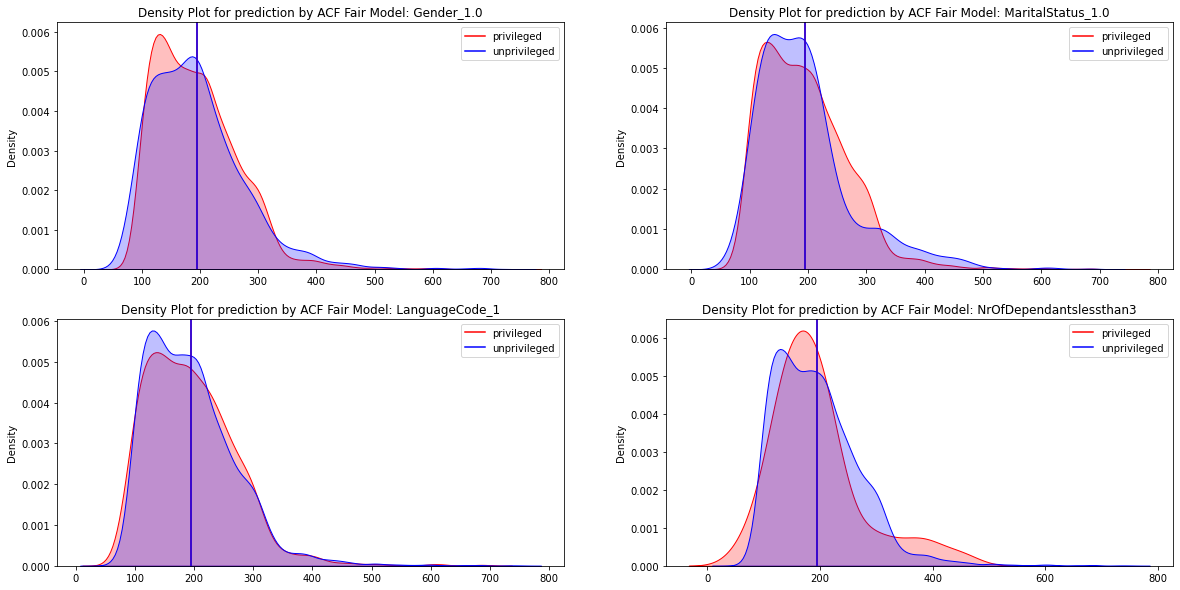

In [25]:
print("Density Plots for Prediction of Sensitive Features by ACF Model")
ACF.get_density_plots()

<div class="alert alert-block alert-success">
<b>Inference:</b>
    The density plots for all sensitive variables show that there is a no difference between the distribution of privileged and unprivileged class after the implementation of the ACF model. This implies that the prediction from the model is now unbiased. The mean ratio for all variables is 1.
</div>

### Full Model and ACF Model with Counterfactual Data

<div class="alert alert-block alert-info">
CUF Score: $\frac{1}{n}\sum({E}$ - ${E'})^{2}$
</div>

In [26]:
error = full_model.get_error(full_model_predictions) # Actual - Predicted - w/o CUF
full_model_counter_factual_data = full_model.get_counterfactual_data() 
full_model_predictions_CUF = full_model.predict(full_model_counter_factual_data) # predicting the counterfactuals with model 
full_model_metrics_CUF = full_model.get_model_metrics() # MSE, RMSE, MAPE
error_counterfactual = full_model.get_error(full_model_predictions_CUF) # Actual - Predicted - with CUF
full_model_CUF_score = (np.sum(np.square(error_counterfactual - error))/len(error)) # paste CUF formula 

In [28]:
error_acf = ACF.get_error(acf_predictions) # Actual - Predicted - w/o CUF
acf_counter_factual_data = ACF.get_counterfactual_data()
df_R_counter_sens_test = ACF.get_residuals_test_data(True) # getting residuals for each sensitive feature i.e diff(actual,predicted) - test data
acf_predictions_CUF = ACF.predict(df_R_counter_sens_test) # predicting the counterfactuals with model 
acf_metrics_CUF = ACF.get_model_metrics() # MSE, RMSE, MAPE
error_counterfactual_acf = ACF.get_error(acf_predictions_CUF) # Actual - Predicted - with CUF
acf_CUF_score = (np.sum(np.square(error_counterfactual_acf - error_acf))/len(error_acf))

In [27]:
print(f"CUF Score for Full Model: {full_model_CUF_score}")

CUF Score for Full Model: 4755.624427997632


In [29]:
print(f"CUF Score for ACF Model: {acf_CUF_score}")

CUF Score for ACF Model: 375.1498461037707


<div class="alert alert-block alert-success">
<b>Inference:</b>
    The CUF Score has reduced drastically from 5033.42 to 489.85 with the ACF model. This helps us conclude that the implementation of ACF technique is successful in mitigating bias.
</div>

### CUF Visualizations

Density Plots for predictions and errors for Factual vs Counterfactual Data by Full Model


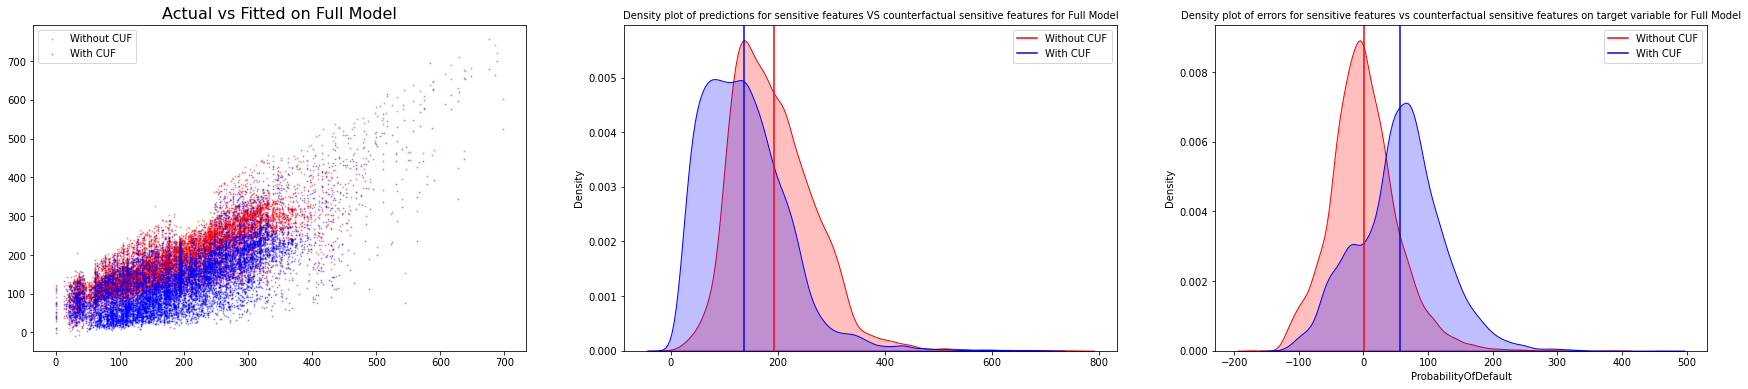

In [30]:
print("Density Plots for predictions and errors for Factual vs Counterfactual Data by Full Model")
full_model.get_plots_CUF(full_model_predictions, full_model_predictions_CUF, error, error_counterfactual)

<div class="alert alert-block alert-success">
<b>Inference:</b>
    The scatter plot shows that there is a stark difference between the actual and fitted values for the full model pre and post inverting the sensitive features (priviliged to unpriviliged and vice versa) which implies that the model is biased.
</div>

Density Plots for predictions and errors for Factual vs Counterfactual Data by ACF Model


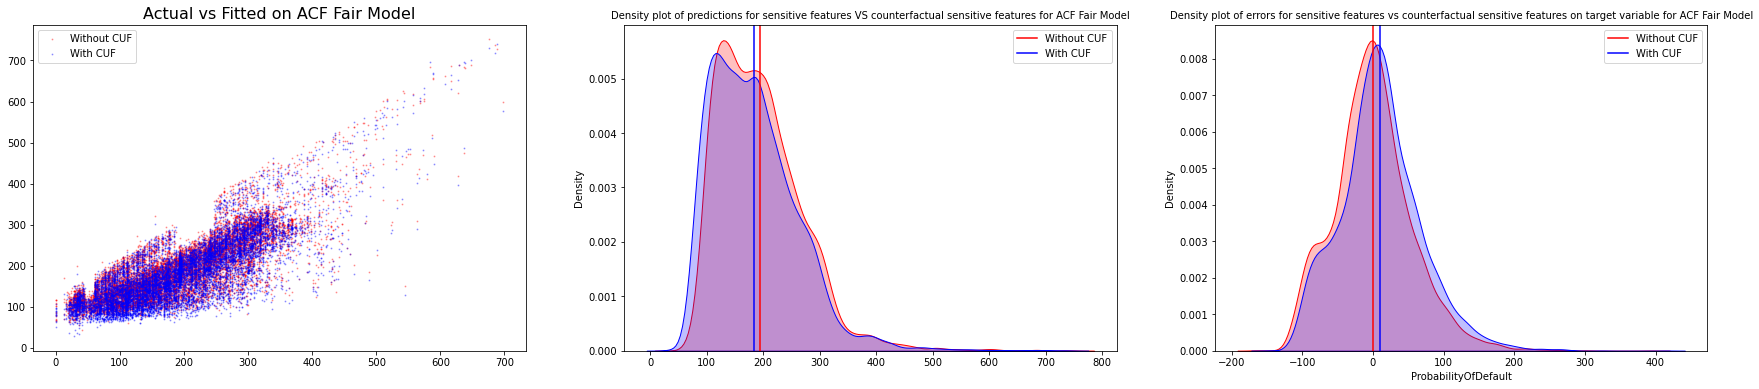

In [31]:
print("Density Plots for predictions and errors for Factual vs Counterfactual Data by ACF Model")
ACF.get_plots_CUF(acf_predictions, acf_predictions_CUF, error_acf, error_counterfactual_acf)

<div class="alert alert-block alert-success">
<b>Inference:</b>
    The scatter plot shows that there is a overlap between the actual and fitted values for the ACF model pre and post inverting the sensitive features (priviliged to unpriviliged and vice versa) which implies that the model is not biased. We can also validate this using the density plots for predictions and errors.
</div>

### Error in predicting Probabilty of Default Vs Applied Loan Amount

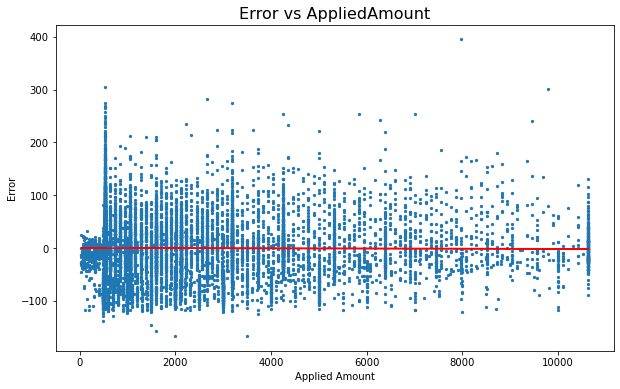

In [32]:
ACF.get_error_vs_amount_plot(X_test_2["AppliedAmount"],acf_predictions)

<div class="alert alert-block alert-success">
<b>Inference:</b>
    The scatter plot for Applied Amount vs Error shows that the values are scattered in a trigular pattern across the best fit line (in red). This implies that for individuals having high Applied Loan Amount, there is less variation in the actual and predicted probabilty of default.
</div>